# MindLens-AI -- Notebook 03: Explainability (RQ1)

**RQ1:** Can explainable NLP models maintain high performance (at least 80% accuracy) while providing meaningful, human-interpretable explanations aligned with mental health indicators?

We use SHAP for global and local feature attribution, LIME for individual instance explanations, and a quantitative interpretability score that measures overlap between the model's most influential features and a curated mental-health vocabulary.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

from src.model import load_model
from src.explainability import (
    explain_with_lime, explain_with_shap, shap_summary,
    interpretability_score, mental_health_vocabulary,
)

sns.set_theme(style="whitegrid")

model, vectorizer = load_model("../data/processed/model_artifacts.joblib")
split = joblib.load("../data/processed/test_split.joblib")
X_test = split["X_test"]
X_train = split["X_train"]
y_test = split["y_test"]
test_texts = split["texts_test"]
feature_names = split["feature_names"]

print(f"Loaded model and {len(test_texts)} test samples.")

Loaded model and 1530 test samples.


## 1. SHAP -- Global Feature Importance

SHAP values shape: (1530, 5000)


c:\Users\Kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


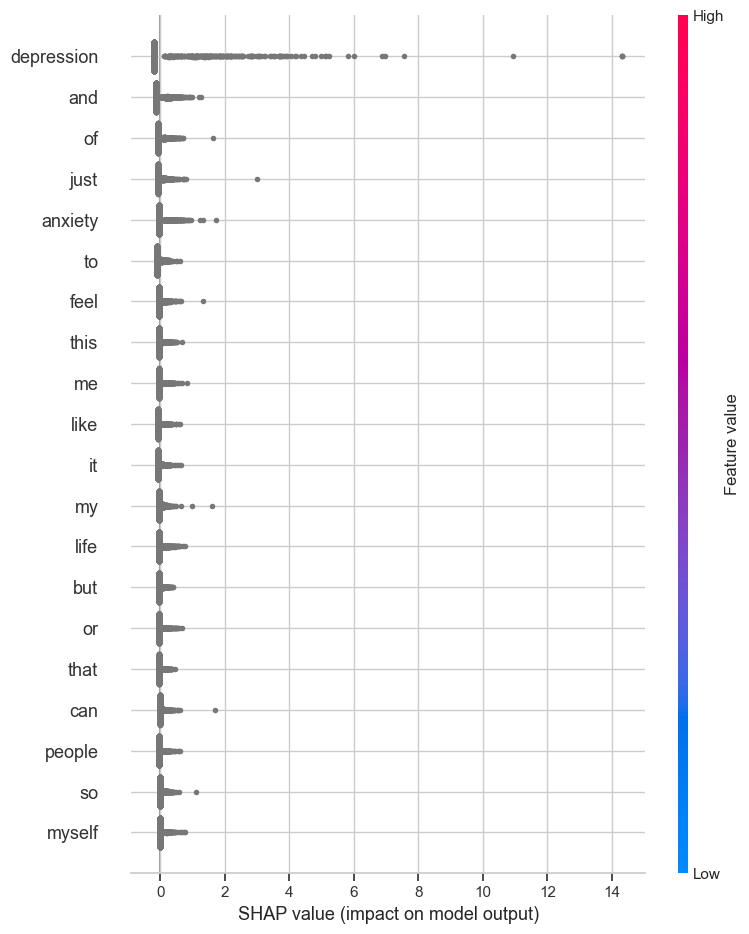

In [2]:
shap_vals, shap_exp = explain_with_shap(model, X_train, X_test, feature_names)
print(f"SHAP values shape: {shap_vals.shape}")

shap_summary(shap_vals, X_test, feature_names, max_display=20)

## 2. SHAP -- Force Plots for Individual Predictions


--- Sample 0 (True: RISK) ---
Text: lately all i basically is sleep i just don t have the energy for anything else these day i wa told i need more intensive treatment but i just don t ha...


<Figure size 640x480 with 0 Axes>

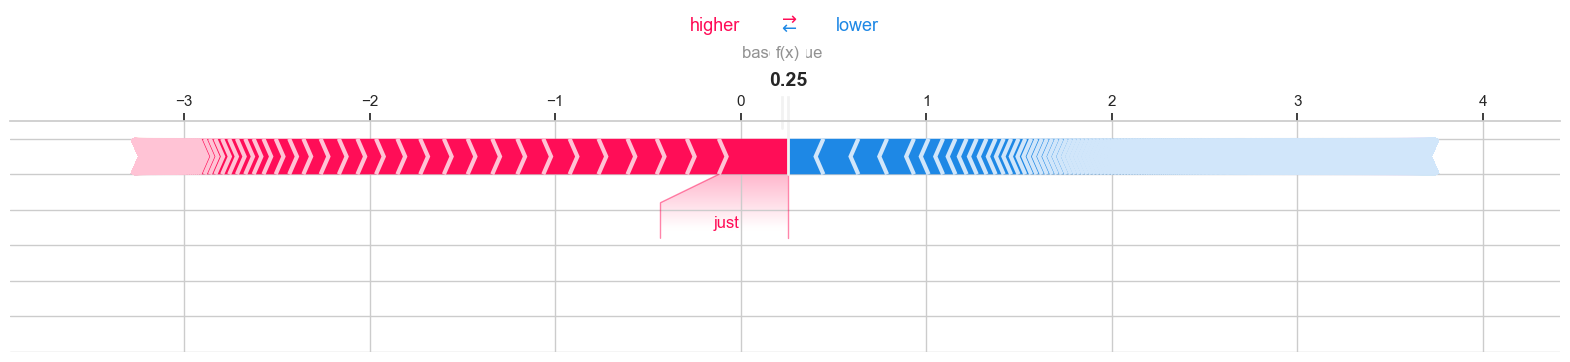


--- Sample 1 (True: RISK) ---
Text: f i am just so tired i hate my life i know there s a beautiful side to life but oh my god i don t even wan na see it if the thing i ve been through ar...


<Figure size 640x480 with 0 Axes>

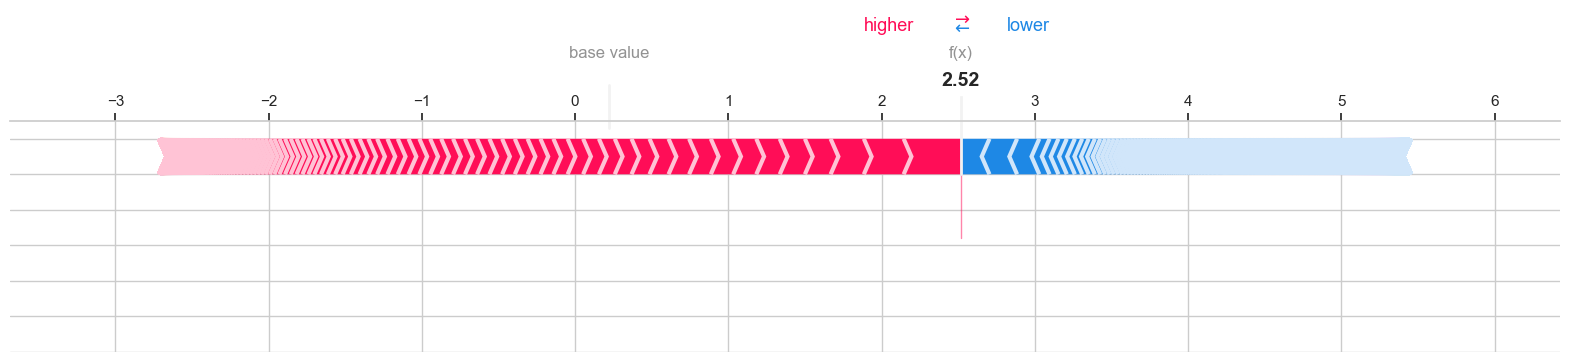


--- Sample 2 (True: RISK) ---
Text: how would you feel if you had told someone that you were depressed and then later on they said that to you idk how to feel ab it on one hand i m like ...


<Figure size 640x480 with 0 Axes>

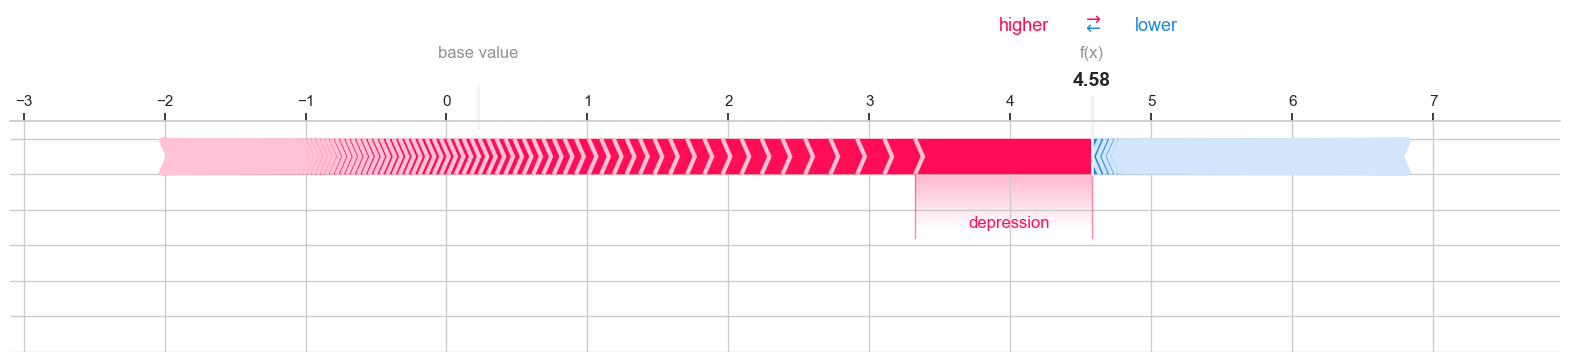


--- Sample 5 (True: RISK) ---
Text: mentalhealth depression http t co new ybx u http t co juf dkhiku...


<Figure size 640x480 with 0 Axes>

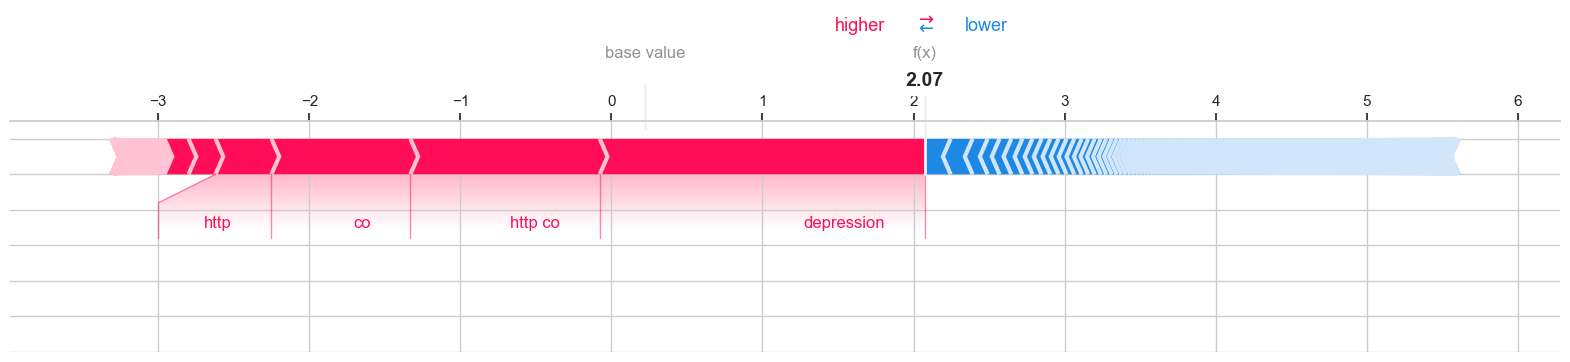


--- Sample 6 (True: RISK) ---
Text: this isn t getting better and i don t want to be here anymore...


<Figure size 640x480 with 0 Axes>

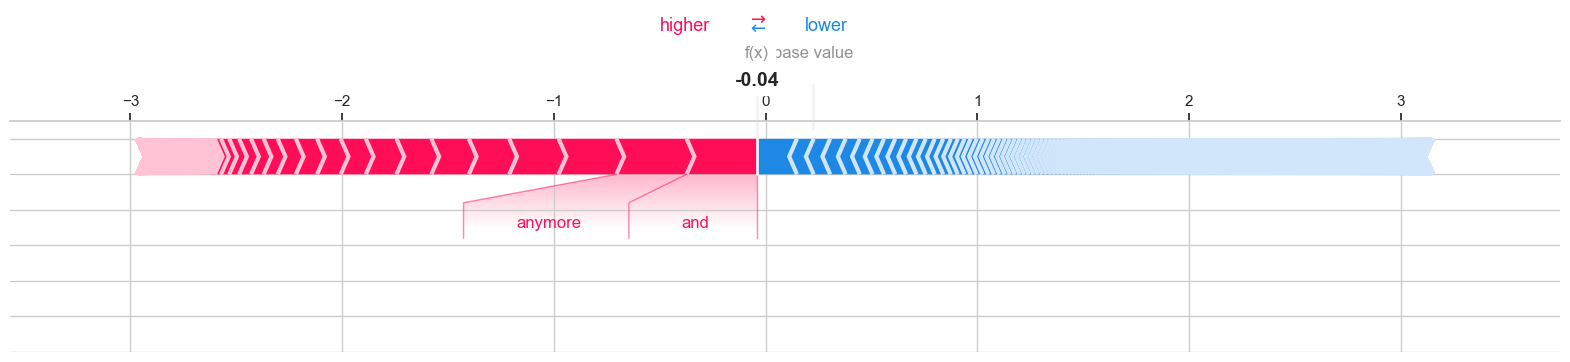


--- Sample 3 (True: NO RISK) ---
Text: mum soup made my stomach make nasty noise...


<Figure size 640x480 with 0 Axes>

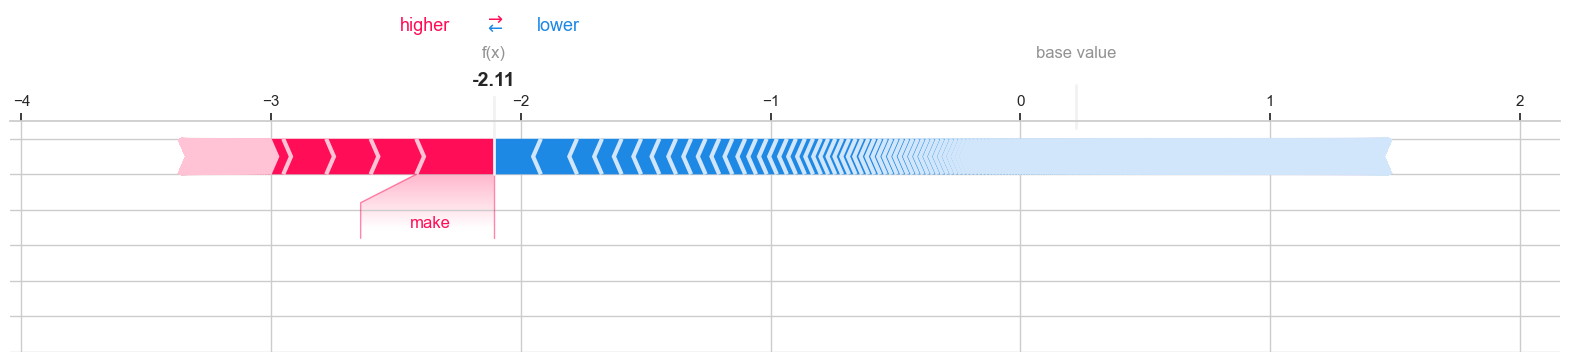


--- Sample 4 (True: NO RISK) ---
Text: cuprohastes don t feed car milky way though they don t like it that advert wa very misleading breaking down on the a isn t fun...


<Figure size 640x480 with 0 Axes>

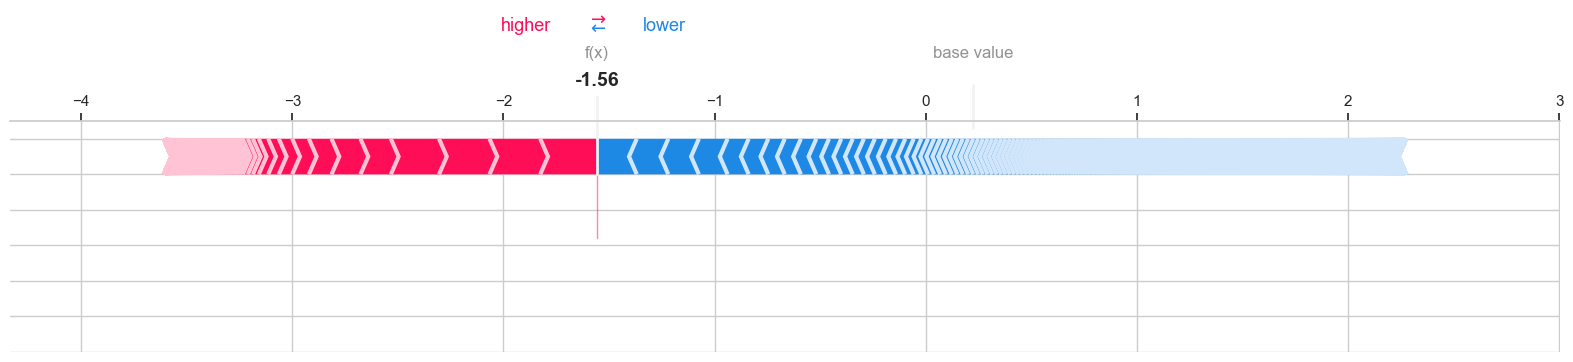


--- Sample 8 (True: NO RISK) ---
Text: vanidosa what s wrong why do you need an inhaler i didn t even know you were sick hope you start feeling better...


<Figure size 640x480 with 0 Axes>

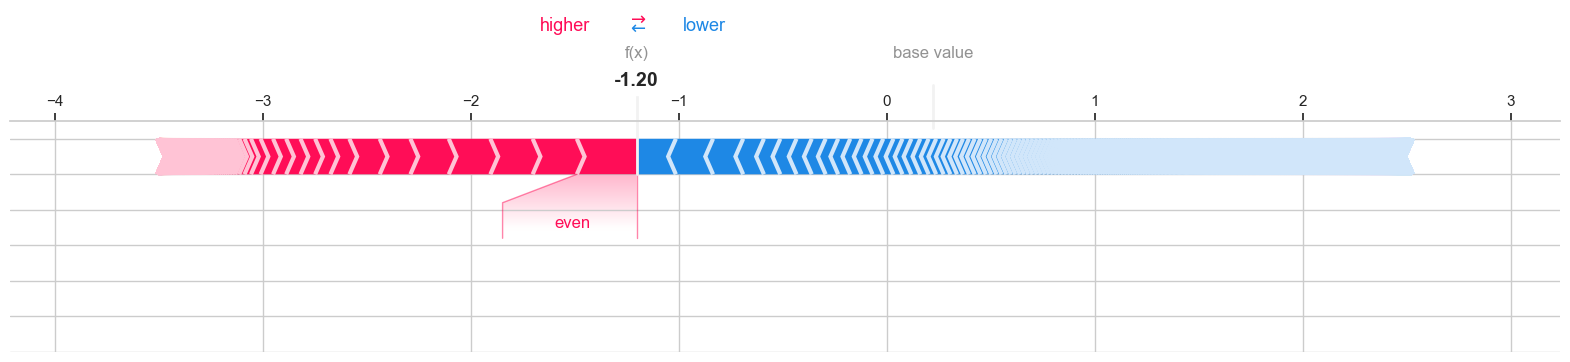


--- Sample 9 (True: NO RISK) ---
Text: shaundiviney i want pizzaaaa...


<Figure size 640x480 with 0 Axes>

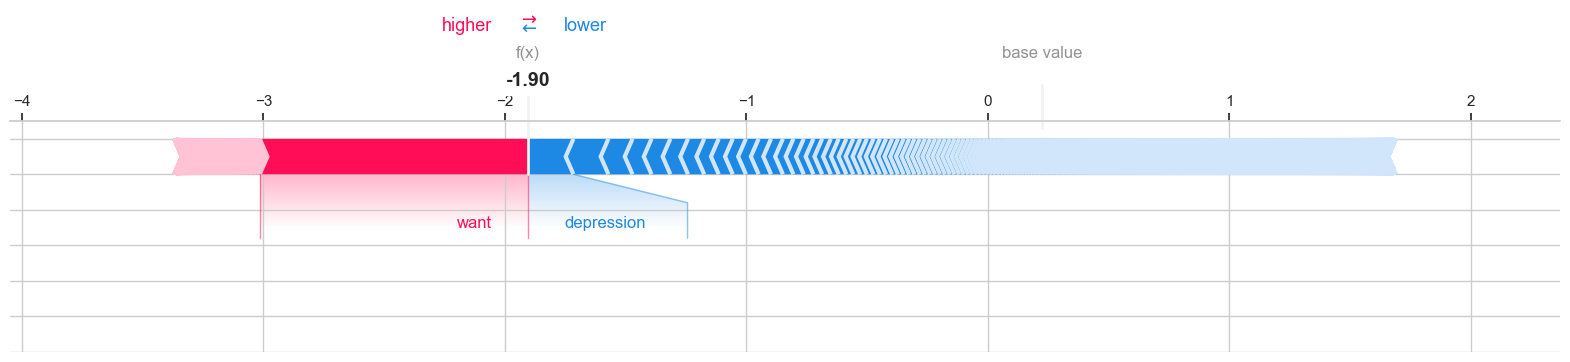


--- Sample 11 (True: NO RISK) ---
Text: i don t like these late start night shift coupled with it being bloody light outside my window when i m meant to be going to sleep...


<Figure size 640x480 with 0 Axes>

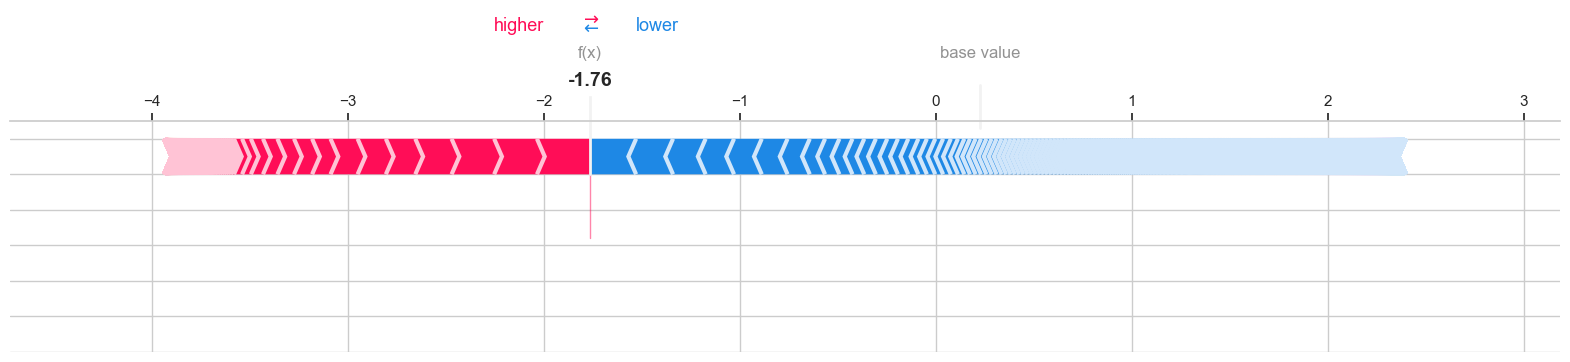

In [3]:
risk_indices = np.where(y_test == 1)[0][:5]
safe_indices = np.where(y_test == 0)[0][:5]
demo_indices = np.concatenate([risk_indices, safe_indices])

for idx in demo_indices:
    true_label = "RISK" if y_test[idx] == 1 else "NO RISK"
    print(f"\n--- Sample {idx} (True: {true_label}) ---")
    print(f"Text: {test_texts[idx][:150]}...")
    plt.figure()
    shap.force_plot(
        shap_exp.expected_value,
        shap_vals[idx],
        feature_names=feature_names,
        matplotlib=True,
    )
    plt.show()

## 3. LIME -- Instance-Level Explanations


--- LIME: Sample 0 (True: RISK) ---
Text: lately all i basically is sleep i just don t have the energy for anything else these day i wa told i need more intensive treatment but i just don t ha...


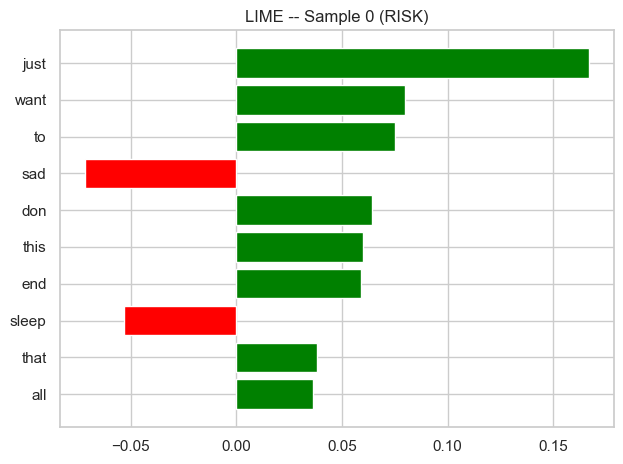

Top features: [('just', 0.16686292123117302), ('want', 0.07962376255054669), ('to', 0.07507002929678107), ('sad', -0.07167945502517135), ('don', 0.06434400271543443), ('this', 0.05978355256653564), ('end', 0.05901960059853123), ('sleep', -0.05340213297567187), ('that', 0.03824396514481818), ('all', 0.03624455071311087)]

--- LIME: Sample 1 (True: RISK) ---
Text: f i am just so tired i hate my life i know there s a beautiful side to life but oh my god i don t even wan na see it if the thing i ve been through ar...


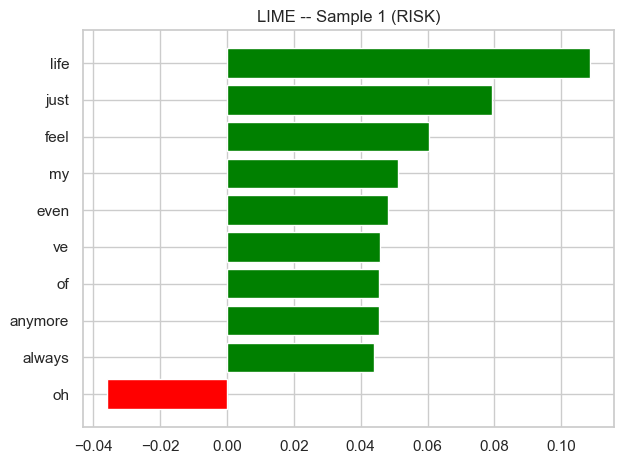

Top features: [('life', 0.10853739293443135), ('just', 0.07924354800888121), ('feel', 0.06031122007025779), ('my', 0.05109906347653319), ('even', 0.048071772958341835), ('ve', 0.04581122134974853), ('of', 0.04557962138162076), ('anymore', 0.04551651700168123), ('always', 0.043995590706309456), ('oh', -0.03595432140999838)]

--- LIME: Sample 2 (True: RISK) ---
Text: how would you feel if you had told someone that you were depressed and then later on they said that to you idk how to feel ab it on one hand i m like ...


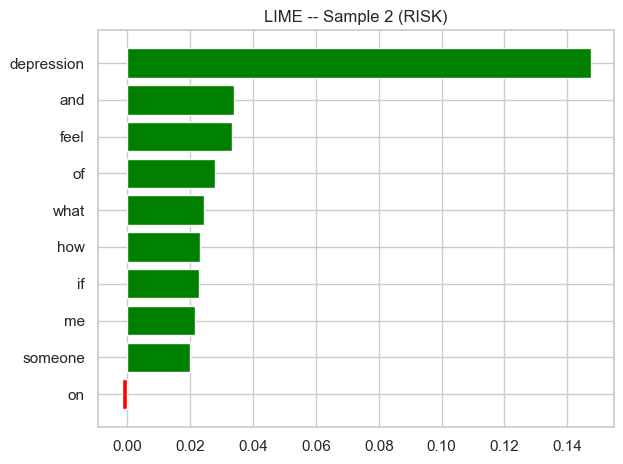

Top features: [('depression', 0.14739350294859907), ('and', 0.033901601790872114), ('feel', 0.03321074894632474), ('of', 0.027860133975196696), ('what', 0.02438108857623849), ('how', 0.0232291935168065), ('if', 0.02277836687995948), ('me', 0.021635826551282922), ('someone', 0.019951855609190935), ('on', -0.0018599564532567618)]

--- LIME: Sample 5 (True: RISK) ---
Text: mentalhealth depression http t co new ybx u http t co juf dkhiku...


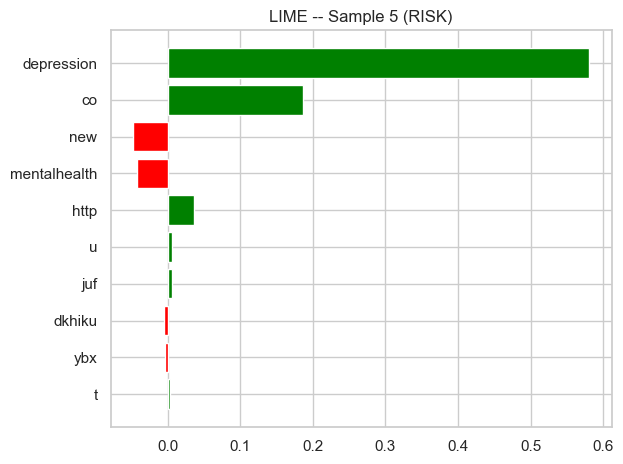

Top features: [('depression', 0.5801084651421861), ('co', 0.18620112527081828), ('new', -0.04704320349032317), ('mentalhealth', -0.04190204558509669), ('http', 0.036890433008646514), ('u', 0.006575639659169507), ('juf', 0.005661123568129515), ('dkhiku', -0.004276533581216832), ('ybx', -0.004090649663802896), ('t', 0.003146688586165035)]

--- LIME: Sample 6 (True: RISK) ---
Text: this isn t getting better and i don t want to be here anymore...


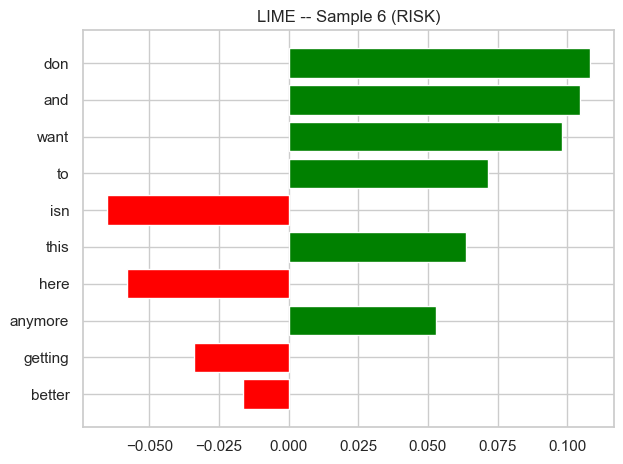

Top features: [('don', 0.10812404852373324), ('and', 0.10462076949667949), ('want', 0.09811287664002394), ('to', 0.07152637863271905), ('isn', -0.06534800384324574), ('this', 0.0637199263724508), ('here', -0.05804271513496863), ('anymore', 0.052907750521686545), ('getting', -0.03395921658608889), ('better', -0.0165845829625662)]

--- LIME: Sample 3 (True: NO RISK) ---
Text: mum soup made my stomach make nasty noise...


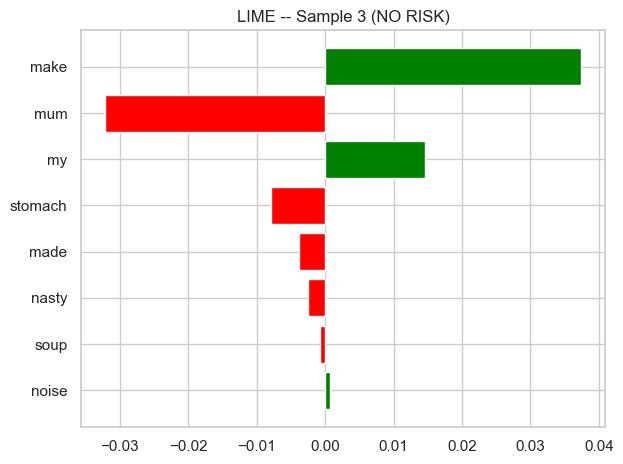

Top features: [('make', 0.037443865237044155), ('mum', -0.0322214088214145), ('my', 0.01462772549885021), ('stomach', -0.007878965799507111), ('made', -0.0038081382303544564), ('nasty', -0.0024328872929200193), ('soup', -0.0008178473994939145), ('noise', 0.0006458078147578608)]

--- LIME: Sample 4 (True: NO RISK) ---
Text: cuprohastes don t feed car milky way though they don t like it that advert wa very misleading breaking down on the a isn t fun...


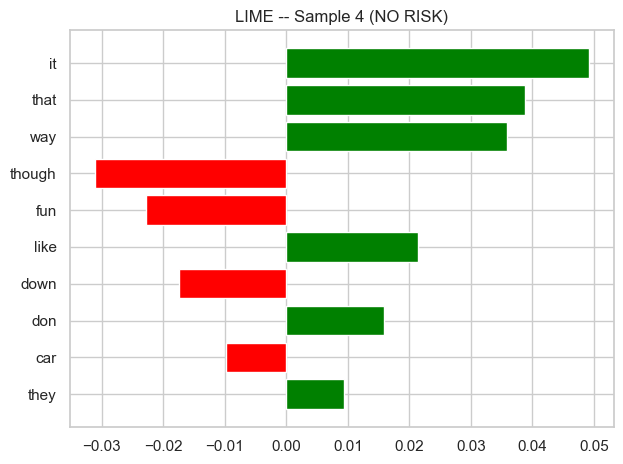

Top features: [('it', 0.049240682679354913), ('that', 0.03883875517616227), ('way', 0.03590534617677349), ('though', -0.031151021039170102), ('fun', -0.022744886306472947), ('like', 0.021365479602844965), ('down', -0.017451078786436553), ('don', 0.015882317256276934), ('car', -0.009721174235060692), ('they', 0.009405677925484721)]

--- LIME: Sample 8 (True: NO RISK) ---
Text: vanidosa what s wrong why do you need an inhaler i didn t even know you were sick hope you start feeling better...


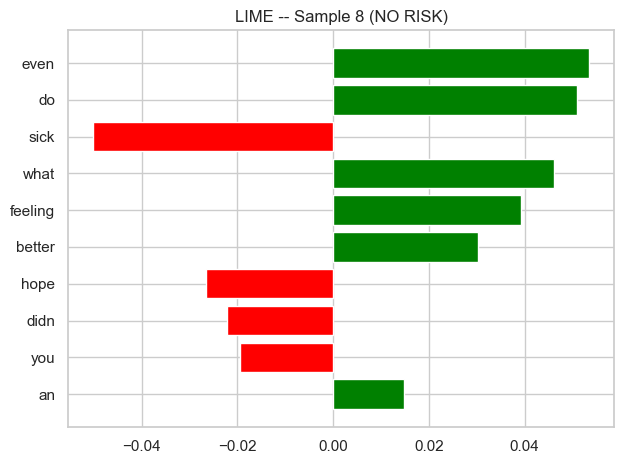

Top features: [('even', 0.053481080147925804), ('do', 0.05087005996542684), ('sick', -0.05015500129070182), ('what', 0.04615125338240079), ('feeling', 0.03918374926979101), ('better', 0.030336548408781472), ('hope', -0.026499486538871946), ('didn', -0.02208241016198078), ('you', -0.019572223829349034), ('an', 0.014813994666250909)]

--- LIME: Sample 9 (True: NO RISK) ---
Text: shaundiviney i want pizzaaaa...


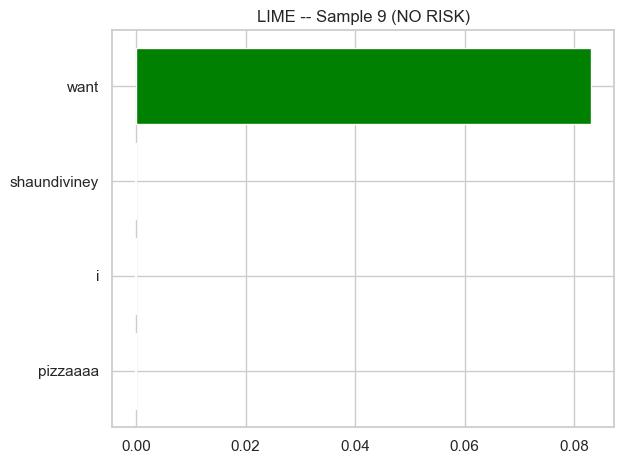

Top features: [('want', 0.08314144629326962), ('shaundiviney', -0.00017336924650941261), ('i', -0.00016788376000689595), ('pizzaaaa', -0.00015125536037329405)]

--- LIME: Sample 11 (True: NO RISK) ---
Text: i don t like these late start night shift coupled with it being bloody light outside my window when i m meant to be going to sleep...


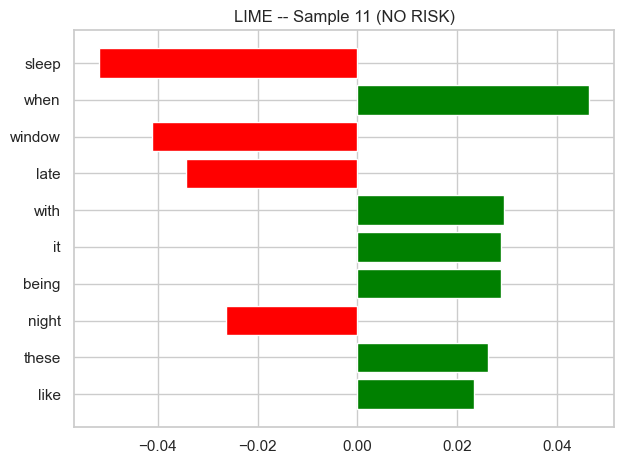

Top features: [('sleep', -0.05186069739671081), ('when', 0.046502267460309055), ('window', -0.04124620271074739), ('late', -0.0344110924517526), ('with', 0.029401121342014027), ('it', 0.02887018252770512), ('being', 0.02886463655803212), ('night', -0.026272090949163513), ('these', 0.026158088911546272), ('like', 0.023314347640605214)]


In [4]:
for idx in demo_indices:
    true_label = "RISK" if y_test[idx] == 1 else "NO RISK"
    text = test_texts[idx]
    print(f"\n--- LIME: Sample {idx} (True: {true_label}) ---")
    print(f"Text: {text[:150]}...")

    explanation = explain_with_lime(model, vectorizer, text, num_features=10)
    fig = explanation.as_pyplot_figure()
    plt.title(f"LIME -- Sample {idx} ({true_label})")
    plt.tight_layout()
    plt.show()

    print("Top features:", explanation.as_list())

## 4. Quantitative Interpretability Score

For each test sample, we look at the top-k SHAP features and count how many overlap with a curated mental-health vocabulary. The score is simply that overlap count divided by k.

Mental health vocabulary (174 terms):
['abandon', 'abuse', 'addict', 'agitat', 'alcohol', 'alive', 'alone', 'always', 'angry', 'anxiety', 'anxious', 'anymore', 'anyone', 'appetite', 'ashamed', 'attack', 'bad', 'bed', 'better', 'binge', 'bipolar', 'brain', 'broken', 'burden', 'burn', 'can', 'college', 'confus', 'cope', 'coping'] ...

  Interpretability @ k=10:  mean=0.2942  std=0.1540

  Interpretability @ k=20:  mean=0.2776  std=0.1049


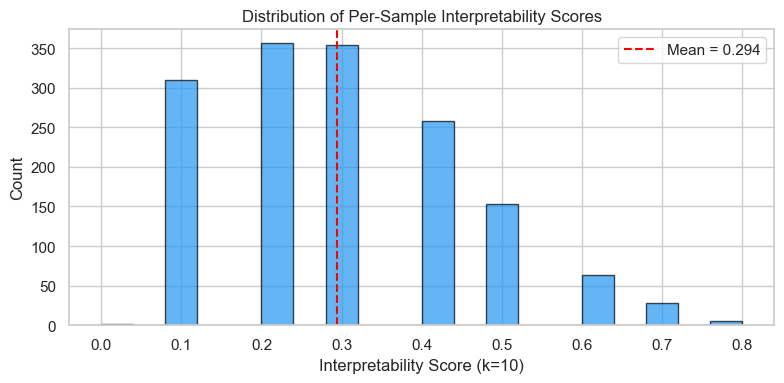

In [5]:
print(f"Mental health vocabulary ({len(mental_health_vocabulary)} terms):")
print(sorted(mental_health_vocabulary)[:30], "...")

for k in [10, 20]:
    scores = interpretability_score(shap_vals, feature_names, mental_health_vocabulary, k=k)
    print(f"\n  Interpretability @ k={k}:  mean={scores['mean_score']:.4f}  std={scores['std_score']:.4f}")

scores_k10 = interpretability_score(shap_vals, feature_names, mental_health_vocabulary, k=10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(scores_k10["per_sample_scores"], bins=20, edgecolor="black", alpha=0.7, color="#2196F3")
ax.axvline(scores_k10["mean_score"], color="red", linestyle="--",
           label=f"Mean = {scores_k10['mean_score']:.3f}")
ax.set_xlabel("Interpretability Score (k=10)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Per-Sample Interpretability Scores")
ax.legend()
plt.tight_layout()
plt.show()

## 5. RQ1 Conclusion

**H1:** Explainable models can achieve at least 80% accuracy without major performance loss.

In [6]:
from src.evaluation import evaluate_single

test_metrics = evaluate_single(model, X_test, y_test)
acc = test_metrics["accuracy"]
f1  = test_metrics["f1"]
interp = scores_k10["mean_score"]

print("=" * 55)
print("  RQ1 CONCLUSION")
print("=" * 55)
print(f"  Accuracy:                {acc:.4f}   (target: >= 0.80)")
print(f"  F1 Score:                {f1:.4f}")
print(f"  Interpretability (k=10): {interp:.4f}")
print()

if acc >= 0.80:
    print("  >>> H1 SUPPORTED")
    print("  The model exceeds 80% accuracy while SHAP and LIME")
    print("  provide transparent, human-readable feature attributions.")
    if interp >= 0.10:
        print(f"  Interpretability score ({interp:.3f}) confirms alignment with")
        print("  clinically relevant mental-health language.")
    else:
        print(f"  Lexicon overlap is modest ({interp:.3f}), suggesting the model")
        print("  picks up on contextual patterns beyond explicit MH keywords --")
        print("  expected behaviour for a TF-IDF model that includes bigrams.")
else:
    print("  >>> H1 NOT SUPPORTED -- accuracy fell below 80%.")

print("\nNotebook 03 complete.")

  RQ1 CONCLUSION
  Accuracy:                0.9608   (target: >= 0.80)
  F1 Score:                0.9588
  Interpretability (k=10): 0.2942

  >>> H1 SUPPORTED
  The model exceeds 80% accuracy while SHAP and LIME
  provide transparent, human-readable feature attributions.
  Interpretability score (0.294) confirms alignment with
  clinically relevant mental-health language.

Notebook 03 complete.
